# Signal Processing Cookbook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import signal

## Pandas DataFrame Indexing with DateTime Index

In signal processing, data is often collected over a period of time, making time series data common in this field. Pandas provides extensive support for working with time series data, and one of the most common operations is indexing DataFrames using a DateTime index. In this section, we will explore various ways to index Pandas DataFrames using a DateTime index.
### Creating a DataFrame with DateTime Index
First, let's create a DataFrame with a DateTime index. We will use the pd.date_range() function to create a DateTime index and then create a DataFrame using this index.

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np

# Creating a DateTime index
date_rng = pd.date_range(start='2020-01-01', end='2020-12-31', freq='M')

# Creating a DataFrame with DateTime index
df = pd.DataFrame(date_rng, columns=['date'])
df['data'] = np.random.randint(0,100,size=(len(date_rng)))

# Setting the date column as the index
df.set_index('date', inplace=True)

# Display the DataFrame
print(df)

            data
date            
2020-01-31    88
2020-02-29    82
2020-03-31    33
2020-04-30     4
2020-05-31    30
2020-06-30    25
2020-07-31    64
2020-08-31    29
2020-09-30    69
2020-10-31    89
2020-11-30    64
2020-12-31    73


### Selecting Data Using DateTime Index
We can select data from the DataFrame using the DateTime index in various ways. Below are some examples:

#### Selecting a Specific Date

In [3]:
selected_data = df.loc['2020-05-31']
print(selected_data)

data    30
Name: 2020-05-31 00:00:00, dtype: int32


#### Selecting a Range of Dates

In [4]:
selected_data = df.loc['2020-05-31':'2020-08-31']
print(selected_data)

            data
date            
2020-05-31    30
2020-06-30    25
2020-07-31    64
2020-08-31    29


### Resampling Time Series Data

Pandas also provides functionality to resample time series data. This is particularly useful in signal processing to aggregate data into different time intervals. Below is an example of resampling 512Hz data into 30-Seconds interval data.

In [5]:
# Creating a time index with a frequency of 512 Hz
# Here, we create a 1-minute long time series as an example
time_index = pd.date_range(start='2022-01-01 00:00:00', periods=512*60, freq=pd.Timedelta(seconds=1/512))

# Creating a DataFrame with random data as an example
df = pd.DataFrame(index=time_index)
df['signal'] = np.random.rand(len(time_index))

# Displaying the original high-frequency data (first 5 rows)
print("Original 512 Hz Data:")
print(df.head())

# Resampling the data to every 30 seconds
resampled_data = df.resample('30S').mean()

# Displaying the resampled data
print("\nResampled Data to 30S:")
print(resampled_data)

Original 512 Hz Data:
                                 signal
2022-01-01 00:00:00.000000000  0.933662
2022-01-01 00:00:00.001953125  0.424164
2022-01-01 00:00:00.003906250  0.214947
2022-01-01 00:00:00.005859375  0.889257
2022-01-01 00:00:00.007812500  0.456827

Resampled Data to 30S:
                       signal
2022-01-01 00:00:00  0.497010
2022-01-01 00:00:30  0.500373


### Arithmetic and Normalization in Pandas DataFrame
In this section, we will explore arithmetic operations and normalization techniques applicable to Pandas DataFrames. These operations are essential in preprocessing data, especially in signal processing, where the manipulation and transformation of signals are often required.
#### Arithmetic Operations
Pandas provides a wide range of methods to perform arithmetic operations on DataFrames. These include addition, subtraction, multiplication, division, and more complex mathematical computations.

In [6]:
# Creating a sample DataFrame
data = {'Signal1': np.random.randint(0, 100, 5),
        'Signal2': np.random.randint(0, 100, 5)}
df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)

# Performing arithmetic operations
df['Sum'] = df['Signal1'] + df['Signal2']
df['Difference'] = df['Signal1'] - df['Signal2']
df['Product'] = df['Signal1'] * df['Signal2']
df['Quotient'] = df['Signal1'] / df['Signal2']

print("\nDataFrame after Arithmetic Operations:")
print(df)

Original DataFrame:
   Signal1  Signal2
0       20       42
1       72       67
2       67       82
3       21       53
4        8       38

DataFrame after Arithmetic Operations:
   Signal1  Signal2  Sum  Difference  Product  Quotient
0       20       42   62         -22      840  0.476190
1       72       67  139           5     4824  1.074627
2       67       82  149         -15     5494  0.817073
3       21       53   74         -32     1113  0.396226
4        8       38   46         -30      304  0.210526


#### Normalizing a DataFrame
Normalization is a technique used to scale the data to a standard range of values. It is particularly useful in signal processing to compare signals of different magnitudes and units on a common scale.

##### Example: Min-Max Normalization
One common method of normalization is Min-Max normalization, where the data is scaled to a range of 0 to 1.

In [7]:
df_normalized = (df[['Signal1', 'Signal2']] - df[['Signal1', 'Signal2']].min()) / \
                (df[['Signal1', 'Signal2']].max() - df[['Signal1', 'Signal2']].min())

print("Normalized DataFrame using Min-Max Normalization:")
print(df_normalized)

Normalized DataFrame using Min-Max Normalization:
    Signal1   Signal2
0  0.187500  0.090909
1  1.000000  0.659091
2  0.921875  1.000000
3  0.203125  0.340909
4  0.000000  0.000000


##### Example: Z-Score Normalization

In [8]:
df_z_normalized = (df[['Signal1', 'Signal2']] - df[['Signal1', 'Signal2']].mean()) / \
                  df[['Signal1', 'Signal2']].std()

print("\nNormalized DataFrame using Z-Score Normalization:")
print(df_z_normalized)


Normalized DataFrame using Z-Score Normalization:
    Signal1   Signal2
0 -0.594208 -0.791137
1  1.161407  0.582365
2  0.992598  1.406466
3 -0.560446 -0.186796
4 -0.999350 -1.010897


## Low/High Pass Filtering with Bandpass Filter Function
In the context of signal processing, filtering is a crucial step to eliminate unwanted components or noise from the data, or to extract useful signals from it. The bandpass_filt function you provided is a versatile tool that can be used for low-pass, high-pass, or band-pass filtering, depending on the mode and cutoff frequency specified.

Here's t the bandpass_filt function:

In [9]:
def bandpass_filt(sig, cutoff, fs, mode):
    nyq = 0.5 * fs
    wn = cutoff / nyq
    sos = signal.butter(4, wn, btype=mode, output='sos')
    if isinstance(sig, pd.DataFrame):
        return pd.DataFrame(data=signal.sosfiltfilt(sos, sig, axis=0), columns=sig.columns, index=sig.index)
    elif isinstance(sig, pd.Series):
        return pd.DataFrame(data=signal.sosfiltfilt(sos, sig, axis=0), columns=[sig.name], index=sig.index)
    else:
        return signal.sosfiltfilt(sos, sig, axis=0)


#### Low-Pass Filtering
A low-pass filter allows signals with a frequency lower than a certain cutoff frequency to pass through and attenuates frequencies higher than the cutoff frequency. Here’s how you can use the bandpass_filt function for low-pass filtering:

In [10]:
# Sample data
data = {'Signal': np.random.rand(100)}
df = pd.DataFrame(data)

# Applying low-pass filter
filtered_data = bandpass_filt(df, cutoff=10, fs=512, mode='low')
print(filtered_data)

      Signal
0   0.990791
1   0.952607
2   0.914924
3   0.877909
4   0.841720
..       ...
95  0.441320
96  0.440525
97  0.439865
98  0.439326
99  0.438894

[100 rows x 1 columns]


#### High-Pass Filtering
A high-pass filter does the opposite, it allows signals with a frequency higher than a certain cutoff frequency to pass through and attenuates frequencies lower than the cutoff frequency.

In [11]:
filtered_data = bandpass_filt(df, cutoff=10, fs=512, mode='high')
print(filtered_data)

      Signal
0  -0.003490
1  -0.268985
2  -0.234797
3  -0.281461
4  -0.012957
..       ...
95 -0.059099
96 -0.220162
97 -0.127233
98 -0.082659
99 -0.019047

[100 rows x 1 columns]


## Spectrogram and Visualizing Different Filters
A spectrogram is a visual representation of the spectrum of frequencies in a signal as they vary with time. It can be a powerful tool for analyzing and understanding the frequency content of signals, especially in the context of signal processing. In this section, we'll discuss how to generate and visualize the spectrogram of original, low-passed, high-passed, and band-passed signals.
### Generating and Visualizing Spectrograms
We'll use the matplotlib and scipy libraries in Python to create spectrograms and visualize them. Below is a step-by-step guide and code example.

In [31]:
fs = 512  # Sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)  # Time array
sig = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*100*t)  # Signal with two frequency components
# Applying low-pass filter
low_passed = bandpass_filt(sig, cutoff=20, fs=fs, mode='low')

# Applying high-pass filter
high_passed = bandpass_filt(sig, cutoff=50, fs=fs, mode='high')

# Applying band-pass filter
band_passed = bandpass_filt(sig, cutoff=np.array([10, 50]), fs=fs, mode='band')

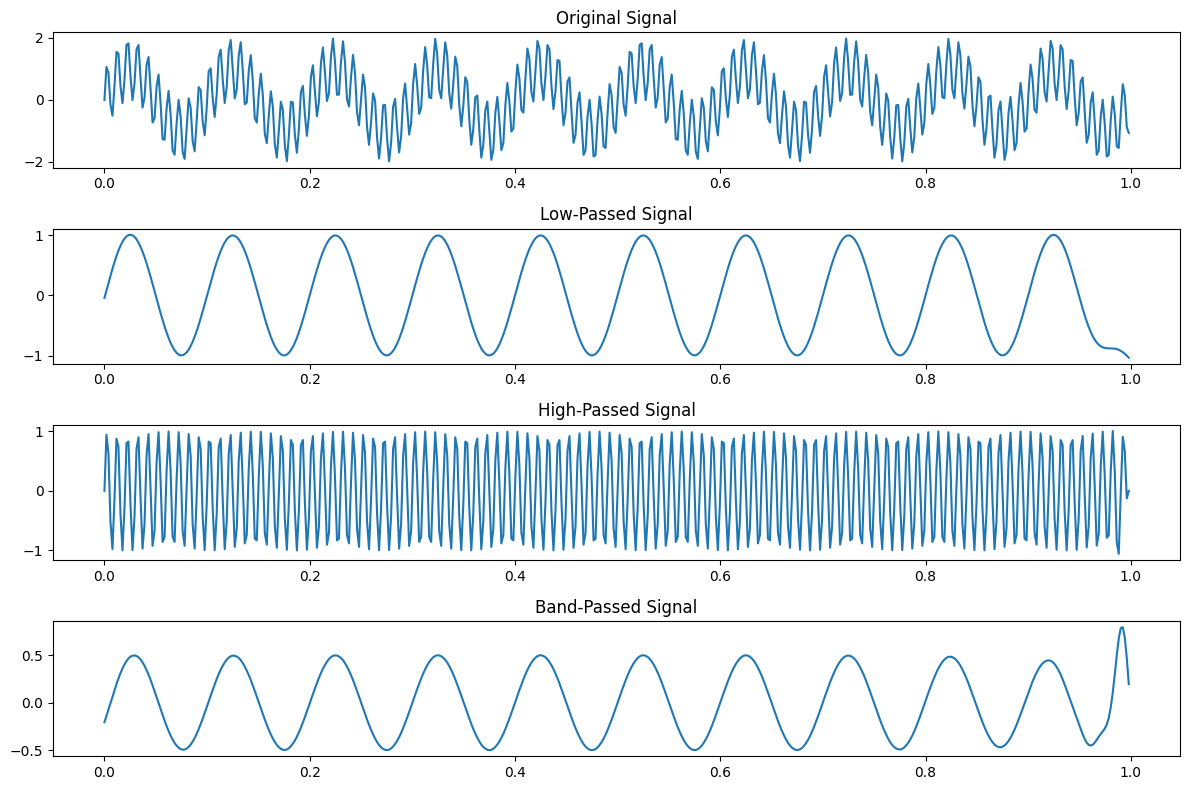

In [32]:
# Plotting original and filtered signals
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(t, sig)
plt.title('Original Signal')

plt.subplot(4, 1, 2)
plt.plot(t, low_passed)
plt.title('Low-Passed Signal')

plt.subplot(4, 1, 3)
plt.plot(t, high_passed)
plt.title('High-Passed Signal')

plt.subplot(4, 1, 4)
plt.plot(t, band_passed)
plt.title('Band-Passed Signal')

plt.tight_layout()
plt.show()


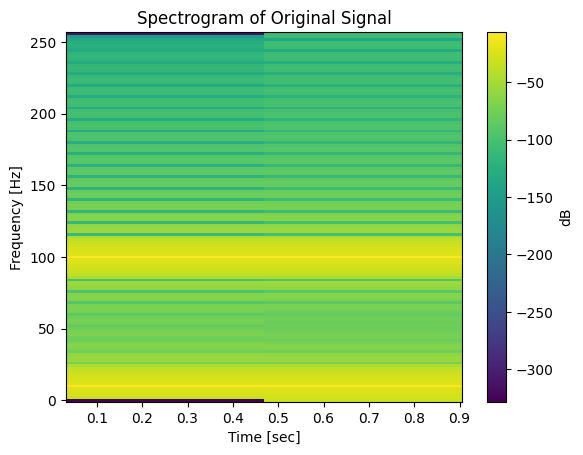

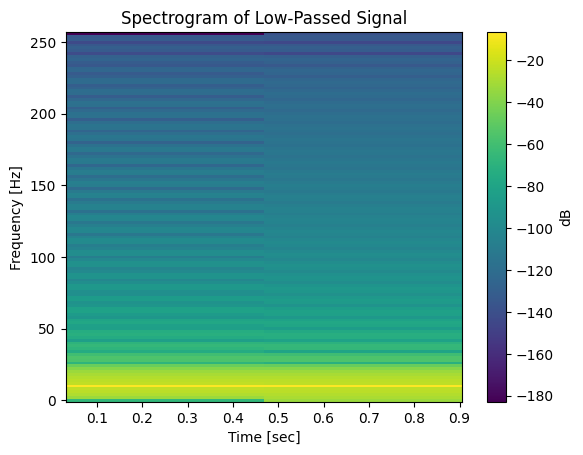

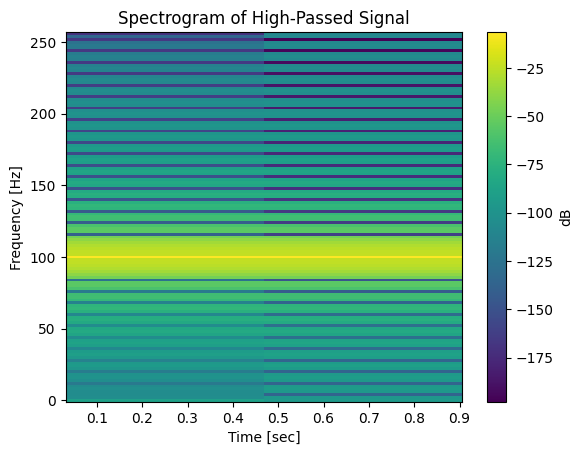

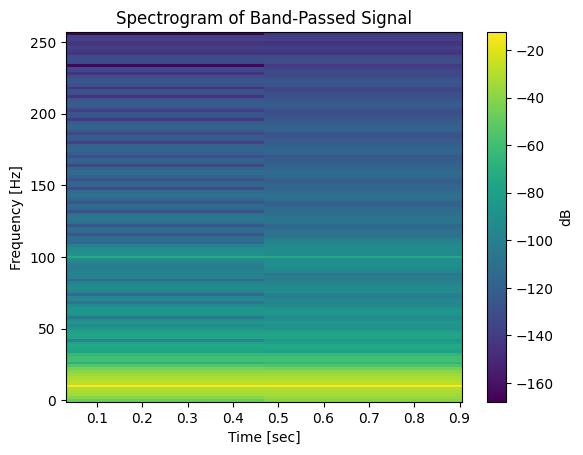

In [33]:
# Function to plot spectrogram
def plot_spectrogram(sig, title):
    f, t, Sxx = signal.spectrogram(sig, fs)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.title(title)
    plt.colorbar(label='dB')
    plt.show()

# Plotting spectrograms
plot_spectrogram(sig, 'Spectrogram of Original Signal')
plot_spectrogram(low_passed, 'Spectrogram of Low-Passed Signal')
plot_spectrogram(high_passed, 'Spectrogram of High-Passed Signal')
plot_spectrogram(band_passed, 'Spectrogram of Band-Passed Signal')
